# Example 4: Classification

## Regression formulation

Let's first treat the problem as a regression problem (output dimension = 1, MSE loss). 

create the two moon dataset

cpu


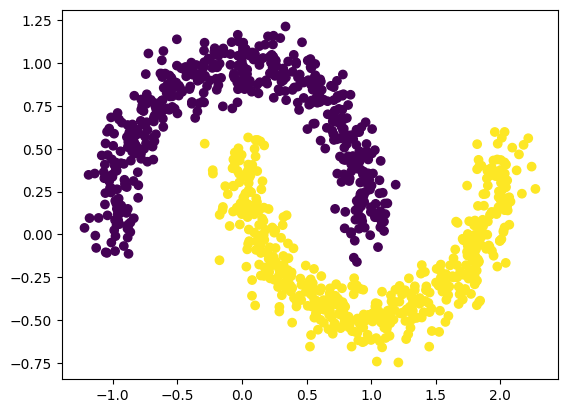

In [3]:
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np
import torch
seed = 42
noise_level = 0.1
torch.manual_seed(seed)
np.random.seed(seed)

# Set the device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=noise_level, random_state=seed)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=noise_level, random_state=seed)

dtype = torch.get_default_dtype()
dataset['train_input'] = torch.from_numpy(train_input).type(dtype).to(device)
dataset['test_input'] = torch.from_numpy(test_input).type(dtype).to(device)
dataset['train_label'] = torch.from_numpy(train_label[:,None]).type(dtype).to(device)
dataset['test_label'] = torch.from_numpy(test_label[:,None]).type(dtype).to(device)

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0].cpu().detach().numpy(), X[:,1].cpu().detach().numpy(), c=y[:,0].cpu().detach().numpy())

Train KAN

In [4]:


# Set random seed for reproducibility


model = KAN(width=[2,1], grid=1, k=2, device=device)

def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).type(dtype))

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).type(dtype))

epochs = 20
result_array = []

for i in range(epochs):
    results = model.fit(dataset, opt="LBFGS", steps=1, metrics=(train_acc, test_acc));
    print(results['train_acc'][-1], results['test_acc'][-1])
    result_array.append(results['test_acc'][-1])

# Save result_array to a text file
# with open(f'results_{seed}_{noise_level}.txt', 'w') as f:
#     for result in result_array:
#         f.write(f"{result}\n")


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.94e-01 | test_loss: 2.94e-01 | reg: 3.25e+00 | : 100%|█| 1/1 [00:00<00:00,  5.24it/s


saving model version 0.1
0.875 0.875


| train_loss: 2.85e-01 | test_loss: 2.85e-01 | reg: 3.30e+00 | : 100%|█| 1/1 [00:00<00:00, 46.51it/s


saving model version 0.2
0.8960000276565552 0.8960000276565552


| train_loss: 2.71e-01 | test_loss: 2.71e-01 | reg: 3.26e+00 | : 100%|█| 1/1 [00:00<00:00, 49.62it/s


saving model version 0.3
0.8989999890327454 0.8989999890327454


| train_loss: 2.41e-01 | test_loss: 2.41e-01 | reg: 3.49e+00 | : 100%|█| 1/1 [00:00<00:00, 49.20it/s


saving model version 0.4
0.9309999942779541 0.9309999942779541


| train_loss: 2.31e-01 | test_loss: 2.31e-01 | reg: 3.44e+00 | : 100%|█| 1/1 [00:00<00:00, 51.34it/s


saving model version 0.5
0.9390000104904175 0.9390000104904175


| train_loss: 2.28e-01 | test_loss: 2.28e-01 | reg: 3.46e+00 | : 100%|█| 1/1 [00:00<00:00, 52.33it/s


saving model version 0.6
0.9409999847412109 0.9409999847412109


| train_loss: 2.17e-01 | test_loss: 2.17e-01 | reg: 3.66e+00 | : 100%|█| 1/1 [00:00<00:00, 50.24it/s


saving model version 0.7
0.9539999961853027 0.9539999961853027


| train_loss: 2.06e-01 | test_loss: 2.06e-01 | reg: 3.73e+00 | : 100%|█| 1/1 [00:00<00:00, 52.46it/s


saving model version 0.8
0.9700000286102295 0.9700000286102295


| train_loss: 2.05e-01 | test_loss: 2.05e-01 | reg: 3.74e+00 | : 100%|█| 1/1 [00:00<00:00, 47.98it/s


saving model version 0.9
0.9710000157356262 0.9710000157356262


| train_loss: 2.04e-01 | test_loss: 2.04e-01 | reg: 3.80e+00 | : 100%|█| 1/1 [00:00<00:00, 47.42it/s


saving model version 0.10
0.9729999899864197 0.9729999899864197


| train_loss: 2.04e-01 | test_loss: 2.04e-01 | reg: 3.80e+00 | : 100%|█| 1/1 [00:00<00:00, 64.10it/s


saving model version 0.11
0.9729999899864197 0.9729999899864197


| train_loss: 2.04e-01 | test_loss: 2.04e-01 | reg: 3.80e+00 | : 100%|█| 1/1 [00:00<00:00, 117.72it/


saving model version 0.12
0.9729999899864197 0.9729999899864197


| train_loss: 2.04e-01 | test_loss: 2.04e-01 | reg: 3.80e+00 | : 100%|█| 1/1 [00:00<00:00, 122.29it/


saving model version 0.13
0.9729999899864197 0.9729999899864197


| train_loss: 2.04e-01 | test_loss: 2.04e-01 | reg: 3.80e+00 | : 100%|█| 1/1 [00:00<00:00, 146.52it/


saving model version 0.14
0.9729999899864197 0.9729999899864197


| train_loss: 2.04e-01 | test_loss: 2.04e-01 | reg: 3.80e+00 | : 100%|█| 1/1 [00:00<00:00, 85.24it/s


saving model version 0.15
0.9729999899864197 0.9729999899864197


| train_loss: 2.04e-01 | test_loss: 2.04e-01 | reg: 3.80e+00 | : 100%|█| 1/1 [00:00<00:00, 140.98it/


saving model version 0.16
0.9729999899864197 0.9729999899864197


| train_loss: 2.04e-01 | test_loss: 2.04e-01 | reg: 3.80e+00 | : 100%|█| 1/1 [00:00<00:00, 103.11it/


saving model version 0.17
0.9729999899864197 0.9729999899864197


| train_loss: 2.04e-01 | test_loss: 2.04e-01 | reg: 3.80e+00 | : 100%|█| 1/1 [00:00<00:00, 122.32it/


saving model version 0.18
0.9729999899864197 0.9729999899864197


| train_loss: 2.04e-01 | test_loss: 2.04e-01 | reg: 3.80e+00 | : 100%|█| 1/1 [00:00<00:00, 72.90it/s


saving model version 0.19
0.9729999899864197 0.9729999899864197


| train_loss: 2.04e-01 | test_loss: 2.04e-01 | reg: 3.80e+00 | : 100%|█| 1/1 [00:00<00:00, 108.53it/

saving model version 0.20
0.9729999899864197 0.9729999899864197


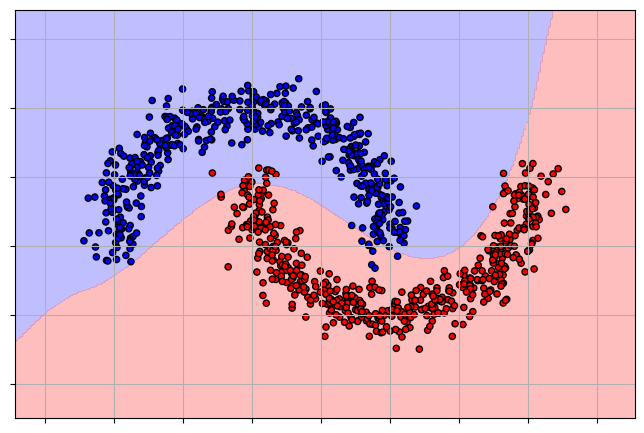

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib.colors import ListedColormap

# 1) Grab data
X = dataset['train_input'].cpu().numpy()
y = dataset['train_label'].cpu().numpy()[:,0]

# 2) Make a mesh over feature space
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# 3) Model predictions on the grid
grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)
with torch.no_grad():
    probs = model(torch.from_numpy(grid).to(device))[:,0].cpu().numpy()
Z = (probs >= 0.5).astype(int).reshape(xx.shape)

# 4) Define “light” (background) and “bold” (points) colormaps
cmap_light = ListedColormap(['#CCCCFF', '#FFCCCC'])  # class0 light blue, class1 light red
cmap_bold  = ListedColormap(['#0000FF', '#FF0000'])  # class0 dark blue,  class1 dark red

# 5) Plot
plt.figure(figsize=(8, 6))

# Decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.5, cmap='bwr')

# Scatter with proper color mapping using ⁠ c= ⁠
plt.scatter(X[:, 0], X[:, 1], c=y[:], cmap='bwr', edgecolors='k', s=20)

# Axes and appearance
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.gca().set_aspect("equal")
plt.grid(True)
plt.tick_params(axis='both', which='both', labelbottom=False, labelleft=False)
# plt.title("Decision Boundary (Color Matched)")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
plt.savefig(fname='imgs/pykan_decisionboundary_seed42.jpg',dpi=700)
plt.show()




Automatic symbolic regression

In [3]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
ex_round(formula, 4)

fixing (0,0,0) with sin, r2=0.9654733538627625, c=2
fixing (0,1,0) with x, r2=0.975755512714386, c=1
saving model version 0.2


-0.853*x_2 - 0.3885*sin(3.1242*x_1 - 1.5464) + 0.7063

How accurate is this formula?

In [4]:
# how accurate is this formula?
def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        correct += np.round(np.array(formula.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)) == y[i,0]
    return correct/batch

print('train acc of the formula:', acc(formula, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula, dataset['test_input'], dataset['test_label']))

train acc of the formula: tensor(0.9980, device='cuda:0')
test acc of the formula: tensor(0.9970, device='cuda:0')


## Classification formulation

Let's then treat the problem as a classification problem (output dimension = 2, CrossEntropy loss). 

Create the two moon datatset

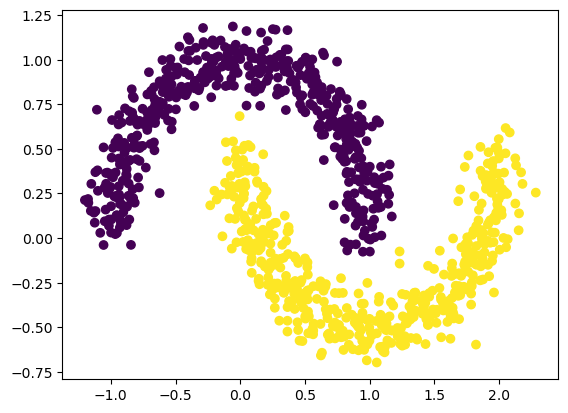

In [5]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).type(dtype).to(device)
dataset['test_input'] = torch.from_numpy(test_input).type(dtype).to(device)
dataset['train_label'] = torch.from_numpy(train_label).type(torch.long).to(device)
dataset['test_label'] = torch.from_numpy(test_label).type(torch.long).to(device)

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0].cpu().detach().numpy(), X[:,1].cpu().detach().numpy(), c=y[:].cpu().detach().numpy())

### Train KAN

In [7]:
model = KAN(width=[2,2], grid=3, k=3, seed=2024, device=device)

def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).type(dtype))

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).type(dtype))

results = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 0.00e+00 | test_loss: 2.37e-01 | reg: 4.10e+02 | : 100%|█| 20/20 [00:01<00:00, 18.81it

saving model version 0.1


Automatic symbolic regression

In [8]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.48220324516296387, c=1
fixing (0,0,1) with x, r2=0.3202315866947174, c=1
fixing (0,1,0) with x, r2=0.9358773231506348, c=1
fixing (0,1,1) with x, r2=0.9290410876274109, c=1
saving model version 0.2


In [9]:
formula1, formula2 = model.symbolic_formula()[0]
ex_round(formula1, 4)

-15.0316*x_1 + 177.9349*x_2 - 63.0716

In [10]:
ex_round(formula2, 4)

60.4718*x_1 - 156.0295*x_2 + 16.9

How accurate is this formula?

In [11]:
# how accurate is this formula?
def acc(formula1, formula2, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        logit1 = np.array(formula1.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        correct += (logit2 > logit1) == y[i]
    return correct/batch

print('train acc of the formula:', acc(formula1, formula2, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula1, formula2, dataset['test_input'], dataset['test_label']))

train acc of the formula: tensor(0.8870, device='cuda:0')
test acc of the formula: tensor(0.8810, device='cuda:0')
